# 🚦 Traffic Signs Classification

### `Student Name: Ayush Poojari`
### `Student Number: 24214170`


### 📁About the dataset

This dataset is preprocessed and ready-to-use for traffic sign classification tasks. The data has been serialized using Python's `pickle` module for convenient loading.

The dataset is split into three separate pickle files:

- `train.pickle` – Preprocessed and augmented training set  
- `valid.pickle` – Validation set  
- `test.pickle` – Testing set  

Each `.pickle` file contains:
- **features**: image data (likely as NumPy arrays)
- **labels**: corresponding traffic sign class indices (0 to 42)

### 🛠️ Dataset Preparation

The original training dataset was **imbalanced**, with some classes significantly underrepresented. To address this, the equalized the dataset using the following data augmentation techniques:
- Brightness adjustment
- Image rotation

As a result the dataset contains:
- The training set size increased to 86,989 examples
- All 43 classes are now equally represented


### 🔗 Kaggle Dataset Link: [Traffic Signs Preprocessed by Valentyn Sichkar](https://www.kaggle.com/datasets/valentynsichkar/traffic-signs-preprocessed)


In [1]:
!nvidia-smi

Mon Apr 28 07:16:05 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   34C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### `Importing Libraries`

In [2]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from timeit import default_timer as timer

from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape

### `Loading the Traffic Sign Dataset: Preprocessed data - by valentynsichkar`

In [3]:
TRAFFIC_SIGN_PREPROCESSED_DATASET_ZIP_FOLDER = "traffic-signs-preprocessed-dataset.zip"

In [4]:
TRAFFIC_SIGN_PREPROCESSED_DATASET_LINK = "16g06hbhbpzCJwSWLdsNRtTlvi4pvZW1l"

### `We can also load Traffic Sign Dataset: GTSRB`

In [7]:
# GTSRB_DATASET_ZIP_FOLDER = "gtsrb-datatset.zip"

In [8]:
# GTSRB_DATASET_LINK = "1ZcOg2fmt14HDZyEpEixILNX_Sm0yZ1ev"

### `📌 NOTE: I have uploaded the same dataset to my google drive and imported directly from google drive as shown below:`

In [5]:
!pip install gdown
!gdown --id {TRAFFIC_SIGN_PREPROCESSED_DATASET_LINK}

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=16g06hbhbpzCJwSWLdsNRtTlvi4pvZW1l
From (redirected): https://drive.google.com/uc?id=16g06hbhbpzCJwSWLdsNRtTlvi4pvZW1l&confirm=t&uuid=52a593e1-788e-4b9a-8159-926a0cc3f909
To: /content/traffic-signs-preprocessed-dataset.zip
100% 4.47G/4.47G [00:32<00:00, 139MB/s]


In [9]:
# !gdown --id {GTSRB_DATASET_LINK}

### `Listing files in the dataset`

In [6]:
import os
import zipfile

def extract_zip_file(zip_path, extract_to):

    should_extract = False

    if not os.path.exists(extract_to):
        should_extract = True
        print("Extract folder doesn't exist - will extract")
    elif os.path.getmtime(zip_path) > os.path.getmtime(extract_to):
        should_extract = True
        print("ZIP file is newer than extract folder - will re-extract")
    else:
        print("Dataset already extracted and up-to-date")

    if should_extract:
        os.makedirs(extract_to, exist_ok=True)
        with zipfile.ZipFile( zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_to)
        print(f"Extracted to '{extract_to}' folder")

    print("\nFolder contents:")
    for item in os.listdir(extract_to):
        print(f"- {item}")



#extract_zip_if_needed(GTSRB_DATASET_ZIP_FOLDER, "gtsrb-dataset")

extract_zip_file(TRAFFIC_SIGN_PREPROCESSED_DATASET_ZIP_FOLDER, "traffic-signs-preprocessed-dataset")

Extract folder doesn't exist - will extract
Extracted to 'traffic-signs-preprocessed-dataset' folder

Folder contents:
- data6.pickle
- data2.pickle
- data5.pickle
- data8.pickle
- valid.pickle
- mean_image_gray.pickle
- data1.pickle
- test.pickle
- datasets_preparing.py
- std_rgb.pickle
- mean_image_rgb.pickle
- data4.pickle
- labels.pickle
- data0.pickle
- std_gray.pickle
- data3.pickle
- train.pickle
- data7.pickle
- label_names.csv


In [10]:
# extract_zip_file(GTSRB_DATASET_ZIP_FOLDER, "gtsrb-dataset")

### `Loading dataset`

In [11]:
data = pd.read_csv('traffic-signs-preprocessed-dataset/label_names.csv')
classes = data['SignName'].values

In [12]:
classes

array(['Speed limit (20km/h)', 'Speed limit (30km/h)',
       'Speed limit (50km/h)', 'Speed limit (60km/h)',
       'Speed limit (70km/h)', 'Speed limit (80km/h)',
       'End of speed limit (80km/h)', 'Speed limit (100km/h)',
       'Speed limit (120km/h)', 'No passing',
       'No passing for vehicles over 3.5 metric tons',
       'Right-of-way at the next intersection', 'Priority road', 'Yield',
       'Stop', 'No vehicles', 'Vehicles over 3.5 metric tons prohibited',
       'No entry', 'General caution', 'Dangerous curve to the left',
       'Dangerous curve to the right', 'Double curve', 'Bumpy road',
       'Slippery road', 'Road narrows on the right', 'Road work',
       'Traffic signals', 'Pedestrians', 'Children crossing',
       'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing',
       'End of all speed and passing limits', 'Turn right ahead',
       'Turn left ahead', 'Ahead only', 'Go straight or right',
       'Go straight or left', 'Keep right', 'Keep le

### `Loading the data from dataset folder:`

In [13]:
!ls ./traffic-signs-preprocessed-dataset

data0.pickle  data5.pickle	     label_names.csv	     std_rgb.pickle
data1.pickle  data6.pickle	     labels.pickle	     test.pickle
data2.pickle  data7.pickle	     mean_image_gray.pickle  train.pickle
data3.pickle  data8.pickle	     mean_image_rgb.pickle   valid.pickle
data4.pickle  datasets_preparing.py  std_gray.pickle


### `Loading data3: RGB Images`

In [14]:
with open('./traffic-signs-preprocessed-dataset/data3.pickle', 'rb') as dataset:
    data = pickle.load(dataset, encoding='latin1')

### `Preprocessing the dataset : traffic-signs-preprocessed-dataset`

In [15]:
def preprocess_dataset(data):
  data['y_train'] = to_categorical(data['y_train'], num_classes=43)
  data['y_validation'] = to_categorical(data['y_validation'], num_classes=43)


  data['x_train'] = data['x_train'].transpose(0, 2, 3, 1)
  data['x_validation'] = data['x_validation'].transpose(0, 2, 3, 1)
  data['x_test'] = data['x_test'].transpose(0, 2, 3, 1)

  for i, j in data.items():
    if i == 'labels':
        print(i + ':', len(j))
    else:
        print(i + ':', j.shape)
  return data

In [16]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_images_from_folder(model_path, label_path, image_folder):
    # Load model and label mappings
    model = load_model(model_path)
    labels_df = pd.read_csv(label_path)
    classes = {i: label for i, label in enumerate(labels_df['SignName'])}

    # Loop through all image files in the folder
    for filename in os.listdir(image_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(image_folder, filename)

            # Load and preprocess image
            img = load_img(image_path, target_size=(32, 32))
            img_array = img_to_array(img) / 255.0
            img_array = np.expand_dims(img_array, axis=0)

            # Predict
            scores = model.predict(img_array)
            prediction = np.argmax(scores)
            confidence = scores[0][prediction]

            # Show image with prediction
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"{filename}\nPrediction: {classes[prediction]} ({confidence:.2f})")
            plt.show()

### `📊 Visualizing the Traffic Sign Dataset`

In [17]:
data = preprocess_dataset(data)

labels: 43
y_validation: (4410, 43)
x_test: (12630, 32, 32, 3)
x_validation: (4410, 32, 32, 3)
x_train: (86989, 32, 32, 3)
y_test: (12630,)
y_train: (86989, 43)


Original shape: (64, 32, 32, 3)


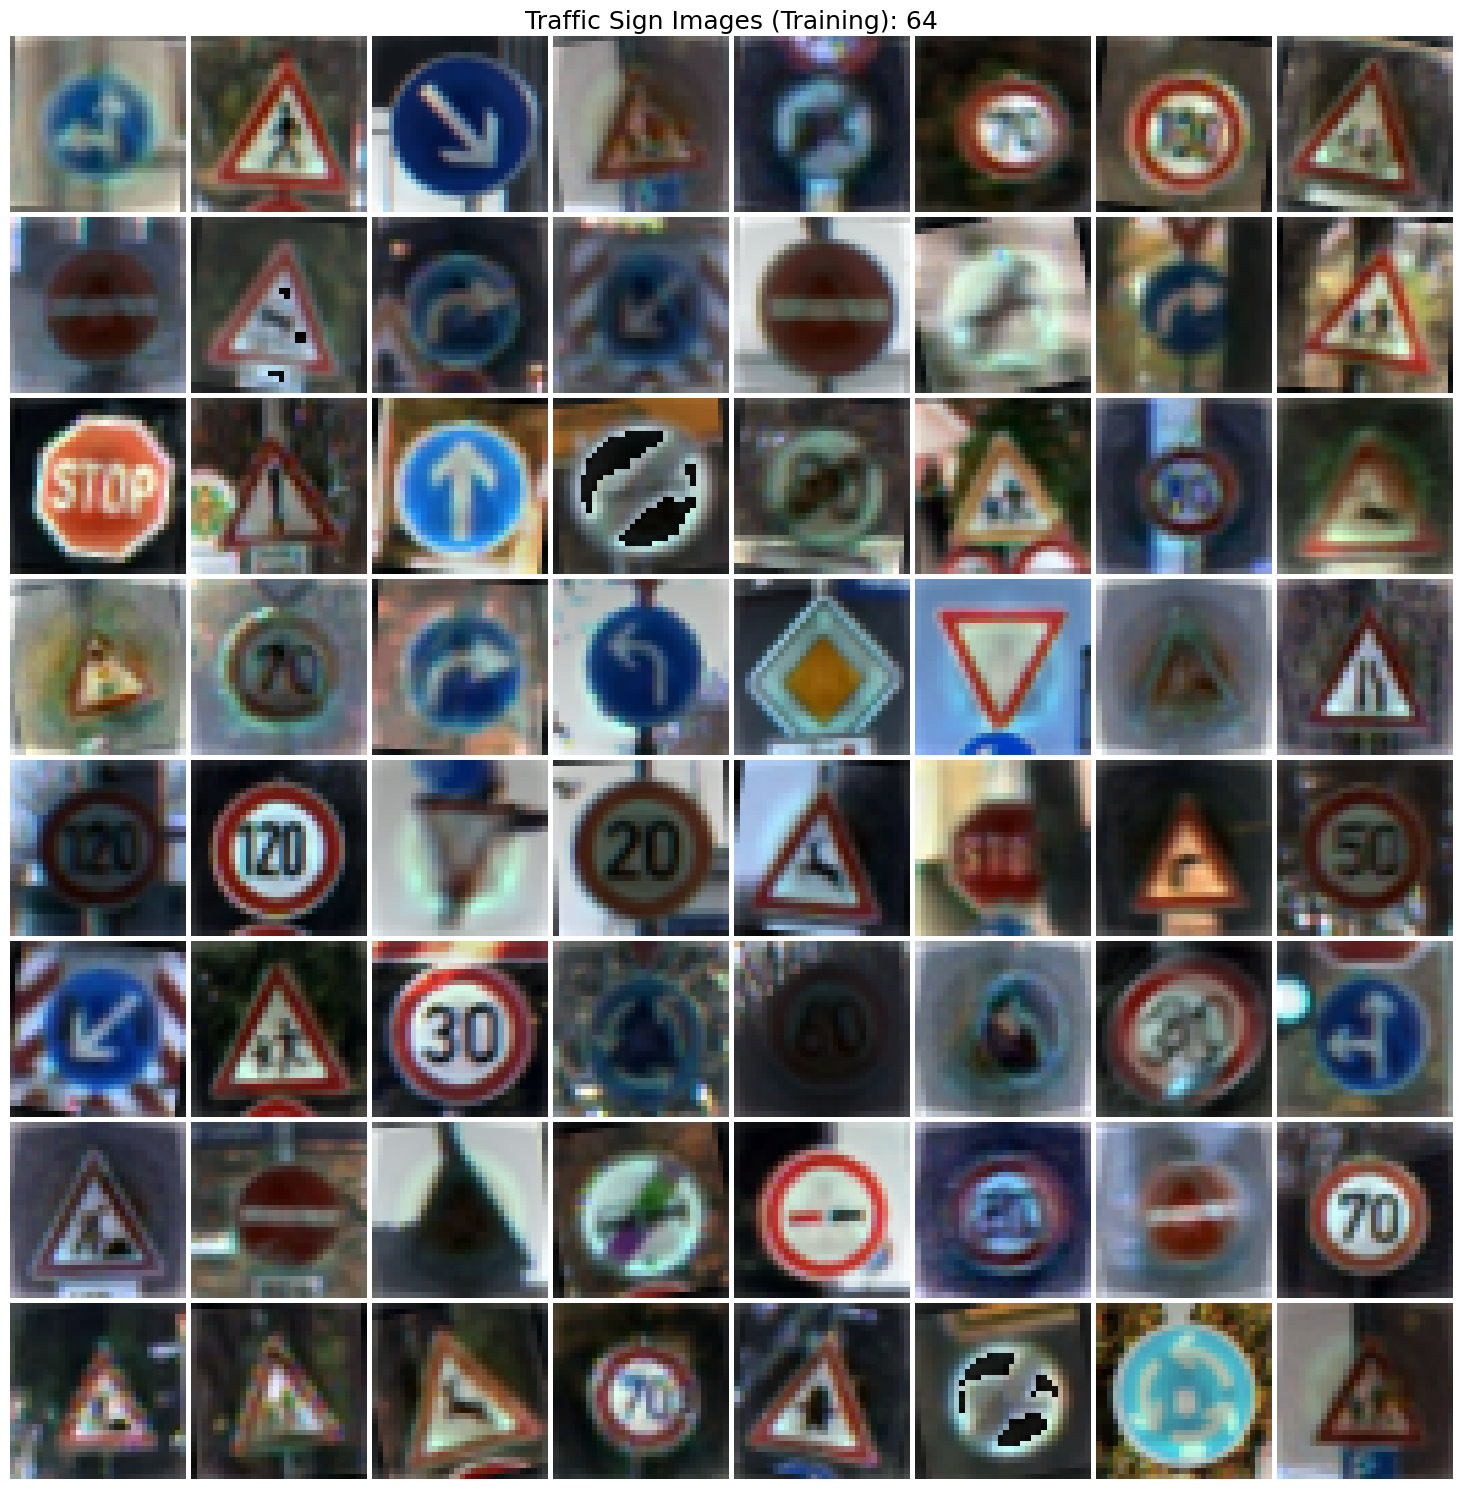

In [18]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt

def convert_to_grid(x_input):
    if x_input.shape[-1] not in [1, 3]:
        x_input = np.transpose(x_input, (0, 1, 3, 2))

    N, H, W, C = x_input.shape
    grid_size = int(np.ceil(np.sqrt(N)))
    grid_height = H * grid_size + 1 * (grid_size - 1)
    grid_width = W * grid_size + 1 * (grid_size - 1)

    grid = np.ones((grid_height, grid_width, 3)) * 255

    next_idx = 0
    y0 = 0
    for y in range(grid_size):
        x0 = 0
        for x in range(grid_size):
            if next_idx < N:
                img = x_input[next_idx]
                if img.shape[-1] == 1:
                    img = np.repeat(img, 3, axis=-1)
                elif img.shape[-1] == 4:
                    img = img[..., :3]

                norm_img = 255 * (img - img.min()) / (img.max() - img.min() + 1e-8)

                grid[y0:y0+H, x0:x0+W, :] = norm_img.reshape(H, W, 3)
                next_idx += 1
            x0 += W + 1
        y0 += H + 1

    return grid.astype('uint8')


number_of_samples = 64
examples = data['x_train'][:number_of_samples]
print("Original shape:", examples.shape)

plt.figure(figsize=(15, 15))
plt.imshow(convert_to_grid(examples))
plt.axis('off')
plt.title(f'Traffic Sign Images (Training): {number_of_samples}', fontsize=18)
plt.tight_layout()
os.makedirs('figures',exist_ok=True)
plt.savefig('./figures/samples.png')
plt.show()

In [19]:
model_results = []

### `Training basic CNN model`

In [20]:
with open('./traffic-signs-preprocessed-dataset/data3.pickle', 'rb') as dataset:
    data = pickle.load(dataset, encoding='latin1')

In [21]:
data = preprocess_dataset(data)

labels: 43
y_validation: (4410, 43)
x_test: (12630, 32, 32, 3)
x_validation: (4410, 32, 32, 3)
x_train: (86989, 32, 32, 3)
y_test: (12630,)
y_train: (86989, 43)


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization

cnn_model = Sequential([
    Conv2D(32, (9, 9), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (9, 9), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(43, activation='softmax')
])

# Compile the model
cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
callbacks = [
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,
        patience=10,
        verbose=1,
        min_lr=1e-6
    ),
    EarlyStopping(
        monitor='val_accuracy',
        verbose=1,
        mode='max',
        baseline=0.98,
    )
]

import time

# Start timer
start_time = time.time()

# Train the model
history = cnn_model.fit(
    data['x_train'], data['y_train'],
    batch_size=128,
    epochs=40,
    validation_data=(data['x_validation'], data['y_validation']),
    callbacks=callbacks,
    verbose=1
)

end_time = time.time()

# Total training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
680/680 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.6263 - loss: 1.4614 - val_accuracy: 0.8769 - val_loss: 0.4052 - learning_rate: 0.0010
Epoch 2/40
680/680 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9494 - loss: 0.1754 - val_accuracy: 0.8989 - val_loss: 0.3410 - learning_rate: 0.0010
Epoch 3/40
680/680 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9682 - loss: 0.1052 - val_accuracy: 0.9116 - val_loss: 0.3201 - learning_rate: 0.0010
Epoch 4/40
680/680 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9749 - loss: 0.0829 - val_accuracy: 0.9202 - val_loss: 0.2673 - learning_rate: 0.0010
Epoch 5/40
680/680 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9795 - loss: 0.0652 - val_accuracy: 0.9181 - val_loss: 0.2771 - learning_rate: 0.0010
Epoch 5: early stopping
Training Time: 60.48 seconds


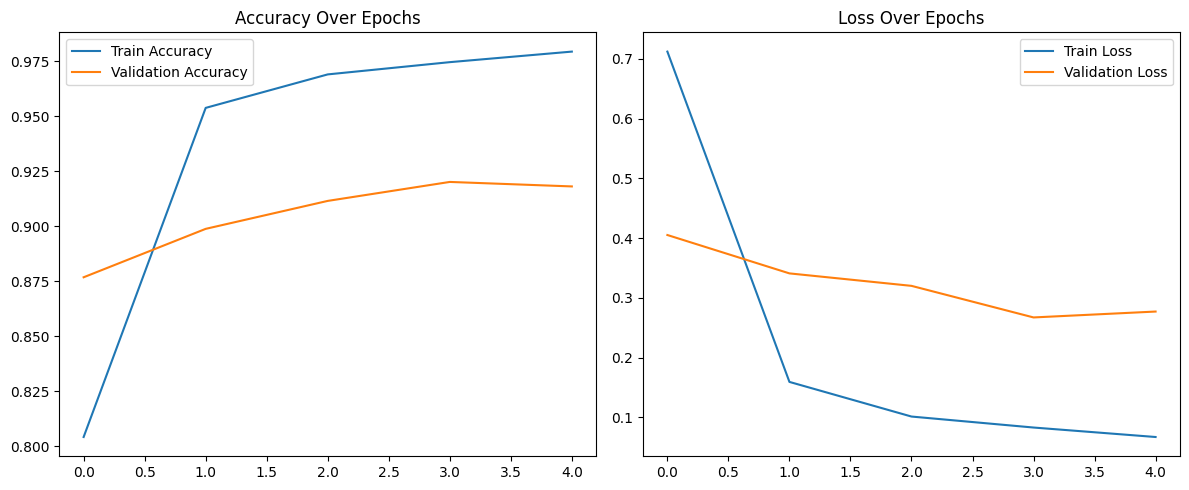

In [23]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.tight_layout()
plt.savefig('./figures/cnn_model_metrics.png')
plt.show()

In [24]:
val_loss, val_acc = cnn_model.evaluate(data['x_validation'], data['y_validation'])
print(f'\nFinal Validation Accuracy: {val_acc:.4f}')
print(f'Final Validation Loss: {val_loss:.4f}')

138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9226 - loss: 0.2628

Final Validation Accuracy: 0.9181
Final Validation Loss: 0.2771


In [25]:
from tensorflow.keras.utils import to_categorical

num_classes = 43

data['y_test'] = to_categorical(data['y_test'], num_classes)

test_loss, test_acc = cnn_model.evaluate(data['x_test'], data['y_test'])
print(f'Test Accuracy: {test_acc:.4f}')
print(f'Test Loss: {test_loss:.4f}')

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9205 - loss: 0.2961
Test Accuracy: 0.9191
Test Loss: 0.2947


In [26]:
model_results.append({
    "model_name": "CNN_baseline_model",
    "training_time": training_time,
    "validation_accuracy": val_acc,
    "test_accuracy": test_acc,
    "test_loss": test_loss
})

In [27]:
os.makedirs('models',exist_ok = True)
cnn_model.save('./models/cnn_baseline_model.h5')
print("CNN baseline model saved")

CNN baseline model saved


#### MCDNN

In [28]:
with open('./traffic-signs-preprocessed-dataset/data3.pickle', 'rb') as dataset:
    data = pickle.load(dataset, encoding='latin1')

In [29]:
data = preprocess_dataset(data)

labels: 43
y_validation: (4410, 43)
x_test: (12630, 32, 32, 3)
x_validation: (4410, 32, 32, 3)
x_train: (86989, 32, 32, 3)
y_test: (12630,)
y_train: (86989, 43)


In [30]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_mcdnn_column(input_shape=(32, 32, 3), num_classes=43):
    model = models.Sequential()

    # Conv Layer 1
    model.add(layers.Conv2D(100, (7, 7), activation='relu', input_shape=input_shape, padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Conv Layer 2
    model.add(layers.Conv2D(150, (4, 4), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Conv Layer 3
    model.add(layers.Conv2D(250, (4, 4), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())

    # Fully Connected Layer
    model.add(layers.Dense(300, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

In [31]:
def average_ensemble(models_list, input_shape=(32, 32, 3)):
    inputs = tf.keras.Input(shape=input_shape)
    outputs = [model(inputs) for model in models_list]
    avg_output = layers.Average()(outputs)
    return tf.keras.Model(inputs=inputs, outputs=avg_output)

In [32]:
# Create 5 columns
columns = [create_mcdnn_column() for _ in range(5)]

# Compile each column
for model in columns:
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

mcdnn_model = average_ensemble(columns)

In [33]:
mcdnn = create_mcdnn_column(input_shape=(32, 32, 3), num_classes=43)
mcdnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, EarlyStopping

# Custom callback to stop training when 99% accuracy is reached
class StopAtAccuracy(Callback):
    def __init__(self, target_acc=0.99):
        super().__init__()
        self.target_acc = target_acc

    def on_epoch_end(self, epoch, logs=None):
        acc = logs.get('val_accuracy')
        if acc is not None and acc >= self.target_acc:
            print(f"\nReached {self.target_acc*100:.2f}% validation accuracy. Stopping training!")
            self.model.stop_training = True


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

start_time = time.time()

history = mcdnn.fit(
    data['x_train'], data['y_train'],
    epochs=30,
    batch_size=128,
    validation_data=(data['x_validation'], data['y_validation']),
    callbacks = [StopAtAccuracy(0.99),early_stopping],
    verbose=1
)

end_time = time.time()

# Total training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

Epoch 1/30
680/680 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.5972 - loss: 1.4605 - val_accuracy: 0.8608 - val_loss: 0.5262
Epoch 2/30
680/680 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.9793 - loss: 0.0719 - val_accuracy: 0.8991 - val_loss: 0.4217
Epoch 3/30
680/680 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.9860 - loss: 0.0467 - val_accuracy: 0.9036 - val_loss: 0.5017
Epoch 4/30
680/680 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.9855 - loss: 0.0521 - val_accuracy: 0.8893 - val_loss: 0.7439
Epoch 5/30
680/680 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.9860 - loss: 0.0500 - val_accuracy: 0.9222 - val_loss: 0.5259
Epoch 6/30
680/680 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.9892 - loss: 0.0412 - val_accuracy: 0.9390 - val_loss: 0.5044
Epoch 7/30
680/680 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.9863 - loss: 0.0537 - val_accuracy: 0.9166 - val_loss: 0.5163
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 2.
Trainin

In [35]:
val_loss, val_acc = mcdnn.evaluate(data['x_validation'], data['y_validation'])
print(f'\nFinal Validation Accuracy: {val_acc:.4f}')
print(f'Final Validation Loss: {val_loss:.4f}')

138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9065 - loss: 0.3903

Final Validation Accuracy: 0.8991
Final Validation Loss: 0.4217


In [36]:
from tensorflow.keras.utils import to_categorical

num_classes = 43
if data['y_test'].ndim == 1:
    data['y_test'] = to_categorical(data['y_test'], num_classes)
test_loss, test_acc = mcdnn.evaluate(data['x_test'], data['y_test'])
print(f'\nTest Accuracy: {test_acc:.4f}')
print(f'Test Loss: {test_loss:.4f}')

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8887 - loss: 0.5049

Test Accuracy: 0.8932
Test Loss: 0.4870


In [37]:
model_results.append({
    "model_name": "mcdnn_model",
    "training_time": training_time,
    "validation_accuracy": val_acc,
    "test_accuracy": test_acc,
    "test_loss": test_loss
})

In [38]:
model_results

[{'model_name': 'CNN_baseline_model',
  'training_time': 60.47602868080139,
  'validation_accuracy': 0.9181405901908875,
  'test_accuracy': 0.9190815687179565,
  'test_loss': 0.2947094440460205},
 {'model_name': 'mcdnn_model',
  'training_time': 155.74928307533264,
  'validation_accuracy': 0.899092972278595,
  'test_accuracy': 0.8931908011436462,
  'test_loss': 0.48699602484703064}]

In [39]:
os.makedirs('models',exist_ok = True)
mcdnn.save('./models/mcdnn_model.h5')
print("CNN baseline model saved")

CNN baseline model saved


### Multiscale CNN

In [40]:
with open('./traffic-signs-preprocessed-dataset/data3.pickle', 'rb') as dataset:
    data = pickle.load(dataset, encoding='latin1')

In [41]:
data = preprocess_dataset(data)

labels: 43
y_validation: (4410, 43)
x_test: (12630, 32, 32, 3)
x_validation: (4410, 32, 32, 3)
x_train: (86989, 32, 32, 3)
y_test: (12630,)
y_train: (86989, 43)


In [42]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input

def build_multiscale_cnn(input_shape=(32, 32, 3), num_classes=43):
    input_layer = Input(shape=input_shape)

    # First scale (original resolution)
    x1 = layers.Conv2D(32, (5, 5), activation='relu', padding='same')(input_layer)
    x1 = layers.MaxPooling2D(pool_size=(2, 2))(x1)
    x1 = layers.Conv2D(64, (5, 5), activation='relu', padding='same')(x1)
    x1 = layers.MaxPooling2D(pool_size=(2, 2))(x1)
    x1 = layers.Flatten()(x1)

    # Second scale (downsampled)
    x2 = layers.AveragePooling2D(pool_size=(2, 2))(input_layer)
    x2 = layers.Conv2D(32, (5, 5), activation='relu', padding='same')(x2)
    x2 = layers.MaxPooling2D(pool_size=(2, 2))(x2)
    x2 = layers.Conv2D(64, (5, 5), activation='relu', padding='same')(x2)
    x2 = layers.Flatten()(x2)

    # Merge both scales
    merged = layers.concatenate([x1, x2])
    merged = layers.Dense(256, activation='relu')(merged)
    merged = layers.Dropout(0.5)(merged)
    output = layers.Dense(num_classes, activation='softmax')(merged)

    model = models.Model(inputs=input_layer, outputs=output)
    return model

In [43]:
multiscale_cnn = build_multiscale_cnn(input_shape=(32, 32, 3), num_classes=43)
multiscale_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

multiscale_cnn.summary()

Model: "functional_56"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 32, 32,    │      2,432 │ input_layer_8[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ average_pooling2d   │ (None, 16, 16, 3) │          0 │ input_layer_8[0]… │
│ (AveragePooling2D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_20    │ (None, 16, 16,    │          0 │ conv2d_20[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 16, 16,    │      2,432 │ average_pooling2… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 16, 16,    │     51,264 │ max_pooling2d_20… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_22    │ (None, 8, 8, 32)  │          0 │ conv2d_22[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_21    │ (None, 8, 8, 64)  │          0 │ conv2d_21[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 8, 8, 64)  │     51,264 │ max_pooling2d_22… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_7 (Flatten) │ (None, 4096)      │          0 │ max_pooling2d_21… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_8 (Flatten) │ (None, 4096)      │          0 │ conv2d_23[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 8192)      │          0 │ flatten_7[0][0],  │
│ (Concatenate)       │                   │            │ flatten_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 256)       │  2,097,408 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 256)       │          0 │ dense_14[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 43)        │     11,051 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,215,851 (8.45 MB)

 Trainable params: 2,215,851 (8.45 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
from tensorflow.keras.callbacks import EarlyStopping
import time

callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=5, mode='max', restore_best_weights=True),
]


start_time = time.time()

history = multiscale_cnn.fit(
    data['x_train'], data['y_train'],
    epochs=50,
    batch_size=128,
    validation_data=(data['x_validation'], data['y_validation']),
    callbacks=callbacks,
    verbose=1
)

end_time = time.time()

training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

Epoch 1/50
680/680 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.5479 - loss: 1.6609 - val_accuracy: 0.9259 - val_loss: 0.2578
Epoch 2/50
680/680 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9494 - loss: 0.1769 - val_accuracy: 0.9490 - val_loss: 0.2320
Epoch 3/50
680/680 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9716 - loss: 0.0992 - val_accuracy: 0.9531 - val_loss: 0.2466
Epoch 4/50
680/680 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9775 - loss: 0.0728 - val_accuracy: 0.9562 - val_loss: 0.2871
Epoch 5/50
680/680 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9820 - loss: 0.0566 - val_accuracy: 0.9567 - val_loss: 0.3006
Epoch 6/50
680/680 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9839 - loss: 0.0523 - val_accuracy: 0.9515 - val_loss: 0.3525
Epoch 7/50
680/680 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9847 - loss: 0.0485 - val_accuracy: 0.9619 - val_loss: 0.3670
Epoch 8/50
680/680 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9861 - loss: 0.0442 - val_accuracy: 

In [45]:
val_loss, val_acc = multiscale_cnn.evaluate(data['x_validation'], data['y_validation'])
print(f'\nFinal Validation Accuracy: {val_acc:.4f}')
print(f'Final Validation Loss: {val_loss:.4f}')

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9641 - loss: 0.2227

Final Validation Accuracy: 0.9633
Final Validation Loss: 0.2404


In [46]:
from tensorflow.keras.utils import to_categorical

num_classes = 43
if data['y_test'].ndim == 1:
    data['y_test'] = to_categorical(data['y_test'], num_classes)
test_loss, test_acc = multiscale_cnn.evaluate(data['x_test'], data['y_test'])
print(f'\nTest Accuracy: {test_acc:.4f}')
print(f'Test Loss: {test_loss:.4f}')

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9482 - loss: 0.3774

Test Accuracy: 0.9461
Test Loss: 0.4014


In [47]:
model_results.append({
    "model_name": "multiscale_model",
    "training_time": training_time,
    "validation_accuracy": val_acc,
    "test_accuracy": test_acc,
    "test_loss": test_loss
})

In [48]:
os.makedirs('models',exist_ok = True)
multiscale_cnn.save('./models/multiscale_cnn.h5')
print("Multiscale CNN model saved")

Multiscale CNN model saved


In [49]:
model_results

[{'model_name': 'CNN_baseline_model',
  'training_time': 60.47602868080139,
  'validation_accuracy': 0.9181405901908875,
  'test_accuracy': 0.9190815687179565,
  'test_loss': 0.2947094440460205},
 {'model_name': 'mcdnn_model',
  'training_time': 155.74928307533264,
  'validation_accuracy': 0.899092972278595,
  'test_accuracy': 0.8931908011436462,
  'test_loss': 0.48699602484703064},
 {'model_name': 'multiscale_model',
  'training_time': 93.06580138206482,
  'validation_accuracy': 0.9632652997970581,
  'test_accuracy': 0.94608074426651,
  'test_loss': 0.401424378156662}]

### LeNet Model

In [50]:
with open('./traffic-signs-preprocessed-dataset/data3.pickle', 'rb') as dataset:
    data = pickle.load(dataset)

In [51]:
data = preprocess_dataset(data)

labels: 43
y_validation: (4410, 43)
x_test: (12630, 32, 32, 3)
x_validation: (4410, 32, 32, 3)
x_train: (86989, 32, 32, 3)
y_test: (12630,)
y_train: (86989, 43)


In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Activation
from tensorflow.keras.layers import InputLayer

lenet_model = Sequential()
lenet_model.add(InputLayer(input_shape=(32, 32, 3)))
lenet_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu'))
lenet_model.add(AveragePooling2D(pool_size=(2, 2)))
lenet_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
lenet_model.add(AveragePooling2D(pool_size=(2, 2)))
lenet_model.add(Flatten())
lenet_model.add(Dense(120, activation='relu'))
lenet_model.add(Dense(84, activation='relu'))
lenet_model.add(Dense(43, activation='softmax'))

lenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
lenet_model.summary()


callbacks = [
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,
        patience=3,
        verbose=1,
        min_lr=1e-6
    ),
    EarlyStopping(
        monitor='val_accuracy',
        verbose=1,
        mode='max',
        baseline=0.98,
    )
]



history = lenet_model.fit(
    data['x_train'], data['y_train'],
    validation_data=(data['x_validation'], data['y_validation']),
    epochs=10,
    batch_size=128,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 28, 28, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 43)             │         3,655 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,811 (253.17 KB)

 Trainable params: 64,811 (253.17 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
680/680 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.4925 - loss: 1.9383 - val_accuracy: 0.8098 - val_loss: 0.6004
Epoch 2/10
680/680 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9165 - loss: 0.3343 - val_accuracy: 0.8540 - val_loss: 0.5087
Epoch 3/10
680/680 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9564 - loss: 0.1731 - val_accuracy: 0.8723 - val_loss: 0.4819
Epoch 4/10
680/680 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9711 - loss: 0.1084 - val_accuracy: 0.8873 - val_loss: 0.4570
Epoch 5/10
680/680 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9777 - loss: 0.0805 - val_accuracy: 0.8800 - val_loss: 0.4700
Epoch 6/10
680/680 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9823 - loss: 0.0602 - val_accuracy: 0.8950 - val_loss: 0.4265
Epoch 7/10
680/680 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9864 - loss: 0.0462 - val_accuracy: 0.8980 - val_loss: 0.5130
Epoch 8/10
680/680 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9890 - loss: 0.0374 - val_accuracy: 0.

In [53]:
val_loss, val_acc = lenet_model.evaluate(data['x_validation'], data['y_validation'])
print(f'\nFinal Validation Accuracy: {val_acc:.4f}')
print(f'Final Validation Loss: {val_loss:.4f}')

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9152 - loss: 0.4333

Final Validation Accuracy: 0.9082
Final Validation Loss: 0.5105


In [54]:
from tensorflow.keras.utils import to_categorical

data['y_test'] = to_categorical(data['y_test'], num_classes=43)

test_loss, test_accuracy = lenet_model.evaluate(data['x_test'], data['y_test'])
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8794 - loss: 0.7755
Test Accuracy: 88.00%


In [55]:
model_results.append({
    "model_name": "lenet_model",
    "training_time": training_time,
    "validation_accuracy": val_acc,
    "test_accuracy": test_acc,
    "test_loss": test_loss
})

In [56]:
model_results

[{'model_name': 'CNN_baseline_model',
  'training_time': 60.47602868080139,
  'validation_accuracy': 0.9181405901908875,
  'test_accuracy': 0.9190815687179565,
  'test_loss': 0.2947094440460205},
 {'model_name': 'mcdnn_model',
  'training_time': 155.74928307533264,
  'validation_accuracy': 0.899092972278595,
  'test_accuracy': 0.8931908011436462,
  'test_loss': 0.48699602484703064},
 {'model_name': 'multiscale_model',
  'training_time': 93.06580138206482,
  'validation_accuracy': 0.9632652997970581,
  'test_accuracy': 0.94608074426651,
  'test_loss': 0.401424378156662},
 {'model_name': 'lenet_model',
  'training_time': 93.06580138206482,
  'validation_accuracy': 0.9081632494926453,
  'test_accuracy': 0.94608074426651,
  'test_loss': 0.7530702352523804}]

In [57]:
lenet_model.save('./models/lenet_model.h5')
print("LeNet model saved")

LeNet model saved


### AlexNet Model

In [58]:
import pickle
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

with open('./traffic-signs-preprocessed-dataset/data3.pickle', 'rb') as dataset:
    data = pickle.load(dataset)

In [59]:
data = preprocess_dataset(data)

labels: 43
y_validation: (4410, 43)
x_test: (12630, 32, 32, 3)
x_validation: (4410, 32, 32, 3)
x_train: (86989, 32, 32, 3)
y_test: (12630,)
y_train: (86989, 43)


In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer

alexnet_model = Sequential()
alexnet_model.add(InputLayer(input_shape=(32, 32, 3)))

alexnet_model.add(Conv2D(filters=96, kernel_size=(3, 3), strides=1, activation='relu', padding='same'))
alexnet_model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

alexnet_model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=1, activation='relu', padding='same'))
alexnet_model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

alexnet_model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=1, activation='relu', padding='same'))
alexnet_model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=1, activation='relu', padding='same'))
alexnet_model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=1, activation='relu', padding='same'))
alexnet_model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

alexnet_model.add(Flatten())
alexnet_model.add(Dense(4096, activation='relu'))
alexnet_model.add(Dropout(0.5))
alexnet_model.add(Dense(4096, activation='relu'))
alexnet_model.add(Dropout(0.5))
alexnet_model.add(Dense(43, activation='softmax'))

alexnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
alexnet_model.summary()


callbacks = [
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,
        patience=3,
        verbose=1,
        min_lr=1e-6
    ),
    EarlyStopping(
        monitor='val_accuracy',
        verbose=1,
        mode='max',
        baseline=0.98,
    )
]




start_time = time.time()

# Train the model
history = alexnet_model.fit(
    data['x_train'], data['y_train'],
    validation_data=(data['x_validation'], data['y_validation']),
    epochs=14,
    batch_size=128,
    verbose=1
)


end_time = time.time()

# Total training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)              │ (None, 32, 32, 96)     │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 16, 16, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 16, 16, 256)    │       221,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 8, 8, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 8, 8, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 8, 8, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 43)             │       176,171 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,060,523 (141.37 MB)

 Trainable params: 37,060,523 (141.37 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/14
680/680 ━━━━━━━━━━━━━━━━━━━━ 50s 60ms/step - accuracy: 0.3114 - loss: 2.4760 - val_accuracy: 0.8621 - val_loss: 0.5364
Epoch 2/14
680/680 ━━━━━━━━━━━━━━━━━━━━ 33s 48ms/step - accuracy: 0.9462 - loss: 0.1732 - val_accuracy: 0.9014 - val_loss: 0.4177
Epoch 3/14
680/680 ━━━━━━━━━━━━━━━━━━━━ 33s 49ms/step - accuracy: 0.9713 - loss: 0.0951 - val_accuracy: 0.9365 - val_loss: 0.2752
Epoch 4/14
680/680 ━━━━━━━━━━━━━━━━━━━━ 34s 49ms/step - accuracy: 0.9732 - loss: 0.0942 - val_accuracy: 0.9274 - val_loss: 0.3790
Epoch 5/14
680/680 ━━━━━━━━━━━━━━━━━━━━ 34s 50ms/step - accuracy: 0.9756 - loss: 0.0939 - val_accuracy: 0.9240 - val_loss: 0.3695
Epoch 6/14
680/680 ━━━━━━━━━━━━━━━━━━━━ 34s 50ms/step - accuracy: 0.9759 - loss: 0.0900 - val_accuracy: 0.9474 - val_loss: 0.2736
Epoch 7/14
680/680 ━━━━━━━━━━━━━━━━━━━━ 34s 50ms/step - accuracy: 0.9800 - loss: 0.0782 - val_accuracy: 0.9283 - val_loss: 0.3303
Epoch 8/14
680/680 ━━━━━━━━━━━━━━━━━━━━ 34s 50ms/step - accuracy: 0.9792 - loss: 0.0829 - 

In [61]:
val_loss, val_acc = alexnet_model.evaluate(data['x_validation'], data['y_validation'])
print(f'\nFinal Validation Accuracy: {val_acc:.4f}')
print(f'Final Validation Loss: {val_loss:.4f}')

138/138 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9408 - loss: 0.2926

Final Validation Accuracy: 0.9435
Final Validation Loss: 0.2861


In [62]:
from tensorflow.keras.utils import to_categorical

data['y_test'] = to_categorical(data['y_test'], num_classes=43)

test_loss, test_accuracy = alexnet_model.evaluate(data['x_test'], data['y_test'])
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9232 - loss: 0.4847
Test Accuracy: 92.20%


In [63]:
model_results.append({
    "model_name": "alexnet_model",
    "training_time": training_time,
    "validation_accuracy": val_acc,
    "test_accuracy": test_acc,
    "test_loss": test_loss
})

In [64]:
model_results

[{'model_name': 'CNN_baseline_model',
  'training_time': 60.47602868080139,
  'validation_accuracy': 0.9181405901908875,
  'test_accuracy': 0.9190815687179565,
  'test_loss': 0.2947094440460205},
 {'model_name': 'mcdnn_model',
  'training_time': 155.74928307533264,
  'validation_accuracy': 0.899092972278595,
  'test_accuracy': 0.8931908011436462,
  'test_loss': 0.48699602484703064},
 {'model_name': 'multiscale_model',
  'training_time': 93.06580138206482,
  'validation_accuracy': 0.9632652997970581,
  'test_accuracy': 0.94608074426651,
  'test_loss': 0.401424378156662},
 {'model_name': 'lenet_model',
  'training_time': 93.06580138206482,
  'validation_accuracy': 0.9081632494926453,
  'test_accuracy': 0.94608074426651,
  'test_loss': 0.7530702352523804},
 {'model_name': 'alexnet_model',
  'training_time': 488.8370695114136,
  'validation_accuracy': 0.9435374140739441,
  'test_accuracy': 0.94608074426651,
  'test_loss': 0.5021840333938599}]

In [65]:
alexnet_model.save('./models/alexnet_model.h5')
print("AlexNet model saved")

AlexNet model saved


### VGGNet

In [66]:
with open('./traffic-signs-preprocessed-dataset/data3.pickle', 'rb') as dataset:
    data = pickle.load(dataset)

In [67]:
data = preprocess_dataset(data)

labels: 43
y_validation: (4410, 43)
x_test: (12630, 32, 32, 3)
x_validation: (4410, 32, 32, 3)
x_train: (86989, 32, 32, 3)
y_test: (12630,)
y_train: (86989, 43)


In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer

vgg = Sequential()
vgg.add(InputLayer(input_shape=(32, 32, 3)))

vgg.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
vgg.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
vgg.add(MaxPooling2D(pool_size=(2, 2)))

vgg.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
vgg.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
vgg.add(MaxPooling2D(pool_size=(2, 2)))

vgg.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
vgg.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
vgg.add(MaxPooling2D(pool_size=(2, 2)))

vgg.add(Flatten())
vgg.add(Dense(512, activation='relu'))
vgg.add(Dropout(0.5))
vgg.add(Dense(512, activation='relu'))
vgg.add(Dropout(0.5))
vgg.add(Dense(43, activation='softmax'))

vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
vgg.summary()




start_time = time.time()

# Train the model
history = vgg.fit(
    data['x_train'], data['y_train'],
    validation_data=(data['x_validation'], data['y_validation']),
    epochs=6,
    batch_size=128,
    verbose=1
)

end_time = time.time()

# Total training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_31 (Conv2D)              │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 43)             │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,527,787 (13.46 MB)

 Trainable params: 3,527,787 (13.46 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6
680/680 ━━━━━━━━━━━━━━━━━━━━ 34s 39ms/step - accuracy: 0.2560 - loss: 2.6717 - val_accuracy: 0.8989 - val_loss: 0.3722
Epoch 2/6
680/680 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.9467 - loss: 0.1845 - val_accuracy: 0.9522 - val_loss: 0.1990
Epoch 3/6
680/680 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.9790 - loss: 0.0733 - val_accuracy: 0.9687 - val_loss: 0.1756
Epoch 4/6
680/680 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.9847 - loss: 0.0547 - val_accuracy: 0.9610 - val_loss: 0.2967
Epoch 5/6
680/680 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.9891 - loss: 0.0401 - val_accuracy: 0.9612 - val_loss: 0.1741
Epoch 6/6
680/680 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.9909 - loss: 0.0336 - val_accuracy: 0.9669 - val_loss: 0.2255
Training Time: 132.26 seconds


In [69]:
val_loss, val_acc = vgg.evaluate(data['x_validation'], data['y_validation'])
print(f'\nFinal Validation Accuracy: {val_acc:.4f}')
print(f'Final Validation Loss: {val_loss:.4f}')

138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9650 - loss: 0.2220

Final Validation Accuracy: 0.9669
Final Validation Loss: 0.2255


In [70]:
from tensorflow.keras.utils import to_categorical

data['y_test'] = to_categorical(data['y_test'], num_classes=43)

test_loss, test_accuracy = vgg.evaluate(data['x_test'], data['y_test'])
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9639 - loss: 0.2127
Test Accuracy: 96.64%


In [71]:
model_results.append({
    "model_name": "vgg_model",
    "training_time": training_time,
    "validation_accuracy": val_acc,
    "test_accuracy": test_acc,
    "test_loss": test_loss
})

In [72]:
vgg.save('./models/vggnet_model.h5')
print("VGG model saved")

VGG model saved


### Training dataset using ResNet Model

In [82]:
with open('./traffic-signs-preprocessed-dataset/data3.pickle', 'rb') as dataset:
    data = pickle.load(dataset)

In [83]:
data = preprocess_dataset(data)

labels: 43
y_validation: (4410, 43)
x_test: (12630, 32, 32, 3)
x_validation: (4410, 32, 32, 3)
x_train: (86989, 32, 32, 3)
y_test: (12630,)
y_train: (86989, 43)


In [84]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2


def resnet_block(x, filters, downsample=False):
    identity = x
    stride = 2 if downsample else 1

    x = layers.Conv2D(filters, (3, 3), strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(filters, (3, 3), strides=1, padding='same')(x)
    x = layers.BatchNormalization()(x)

    if downsample or identity.shape[-1] != filters:
        identity = layers.Conv2D(filters, (1, 1), strides=stride, padding='same')(identity)
        identity = layers.BatchNormalization()(identity)

    x = layers.add([x, identity])
    x = layers.ReLU()(x)
    return x

# Build ResNet model
def build_resnet(input_shape=(32, 32, 3), num_classes=43):
    inputs = Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', strides=1)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = resnet_block(x, 64)
    x = resnet_block(x, 64)

    x = resnet_block(x, 128, downsample=True)
    x = resnet_block(x, 128)

    x = resnet_block(x, 256, downsample=True)
    x = resnet_block(x, 256)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

# Define callbacks
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, min_lr=1e-6),
    EarlyStopping(monitor='val_accuracy', verbose=1, mode='max', baseline=0.98, restore_best_weights=True)
]

# Compile and train the model
resnet_model = build_resnet(input_shape=(32, 32, 3), num_classes=43)
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

resnet_model.summary()


start_time = time.time()

# Train the model
history = resnet_model.fit(
    data['x_train'], data['y_train'],
    validation_data=(data['x_validation'], data['y_validation']),
    epochs=6,
    batch_size=64,
    callbacks=callbacks
)

end_time = time.time()

# Total training time
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

# Save the trained model


Model: "functional_94"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_37 (Conv2D)  │ (None, 32, 32,    │      1,792 │ input_layer_12[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_37[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_38 (Conv2D)  │ (None, 32, 32,    │     36,928 │ re_lu[0][0]       │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_38[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_39 (Conv2D)  │ (None, 32, 32,    │     36,928 │ re_lu_1[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_39[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ re_lu[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 32, 32,    │          0 │ add[0][0]         │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_40 (Conv2D)  │ (None, 32, 32,    │     36,928 │ re_lu_2[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_40[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_41 (Conv2D)  │ (None, 32, 32,    │     36,928 │ re_lu_3[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ conv2d_41[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 32, 32,    │          0 │ batch_normalizat

 Total params: 2,820,267 (10.76 MB)

 Trainable params: 2,815,787 (10.74 MB)

 Non-trainable params: 4,480 (17.50 KB)

Epoch 1/6
1360/1360 ━━━━━━━━━━━━━━━━━━━━ 83s 49ms/step - accuracy: 0.3528 - loss: 2.2656 - val_accuracy: 0.8934 - val_loss: 0.3126 - learning_rate: 0.0010
Epoch 2/6
1360/1360 ━━━━━━━━━━━━━━━━━━━━ 59s 44ms/step - accuracy: 0.9760 - loss: 0.0874 - val_accuracy: 0.8796 - val_loss: 0.5629 - learning_rate: 0.0010
Epoch 2: early stopping
Restoring model weights from the end of the best epoch: 1.
Training Time: 145.37 seconds


In [86]:
val_loss, val_acc = resnet_model.evaluate(data['x_validation'], data['y_validation'])
print(f'\nFinal Validation Accuracy: {val_acc:.4f}')
print(f'Final Validation Loss: {val_loss:.4f}')

138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8926 - loss: 0.3158

Final Validation Accuracy: 0.8934
Final Validation Loss: 0.3126


In [85]:
from tensorflow.keras.utils import to_categorical

data['y_test'] = to_categorical(data['y_test'], num_classes=43)

test_loss, test_accuracy = resnet_model.evaluate(data['x_test'], data['y_test'])
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

395/395 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8675 - loss: 0.4706
Test Accuracy: 86.73%


In [87]:
model_results.append({
    "model_name": "resnet_model",
    "training_time": training_time,
    "validation_accuracy": val_acc,
    "test_accuracy": test_acc,
    "test_loss": test_loss
})

In [88]:
resnet_model.save('./models/resnet_model.h5')

### Evaluation

In [74]:
model_results

[{'model_name': 'CNN_baseline_model',
  'training_time': 60.47602868080139,
  'validation_accuracy': 0.9181405901908875,
  'test_accuracy': 0.9190815687179565,
  'test_loss': 0.2947094440460205},
 {'model_name': 'mcdnn_model',
  'training_time': 155.74928307533264,
  'validation_accuracy': 0.899092972278595,
  'test_accuracy': 0.8931908011436462,
  'test_loss': 0.48699602484703064},
 {'model_name': 'multiscale_model',
  'training_time': 93.06580138206482,
  'validation_accuracy': 0.9632652997970581,
  'test_accuracy': 0.94608074426651,
  'test_loss': 0.401424378156662},
 {'model_name': 'lenet_model',
  'training_time': 93.06580138206482,
  'validation_accuracy': 0.9081632494926453,
  'test_accuracy': 0.94608074426651,
  'test_loss': 0.7530702352523804},
 {'model_name': 'alexnet_model',
  'training_time': 488.8370695114136,
  'validation_accuracy': 0.9435374140739441,
  'test_accuracy': 0.94608074426651,
  'test_loss': 0.5021840333938599},
 {'model_name': 'vgg_model',
  'training_time':

<ipython-input-75-5a1bc7485e2d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="model_name", y="validation_accuracy", ax=axs[0, 0], palette="Blues_d")
<ipython-input-75-5a1bc7485e2d>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="model_name", y="test_accuracy", ax=axs[0, 1], palette="Greens_d")
<ipython-input-75-5a1bc7485e2d>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="model_name", y="test_loss", ax=axs[1, 0], palette="Reds_d")
<ipython-input-75-5a1bc7485e2d>:28: FutureWarning: 

Passing `palett

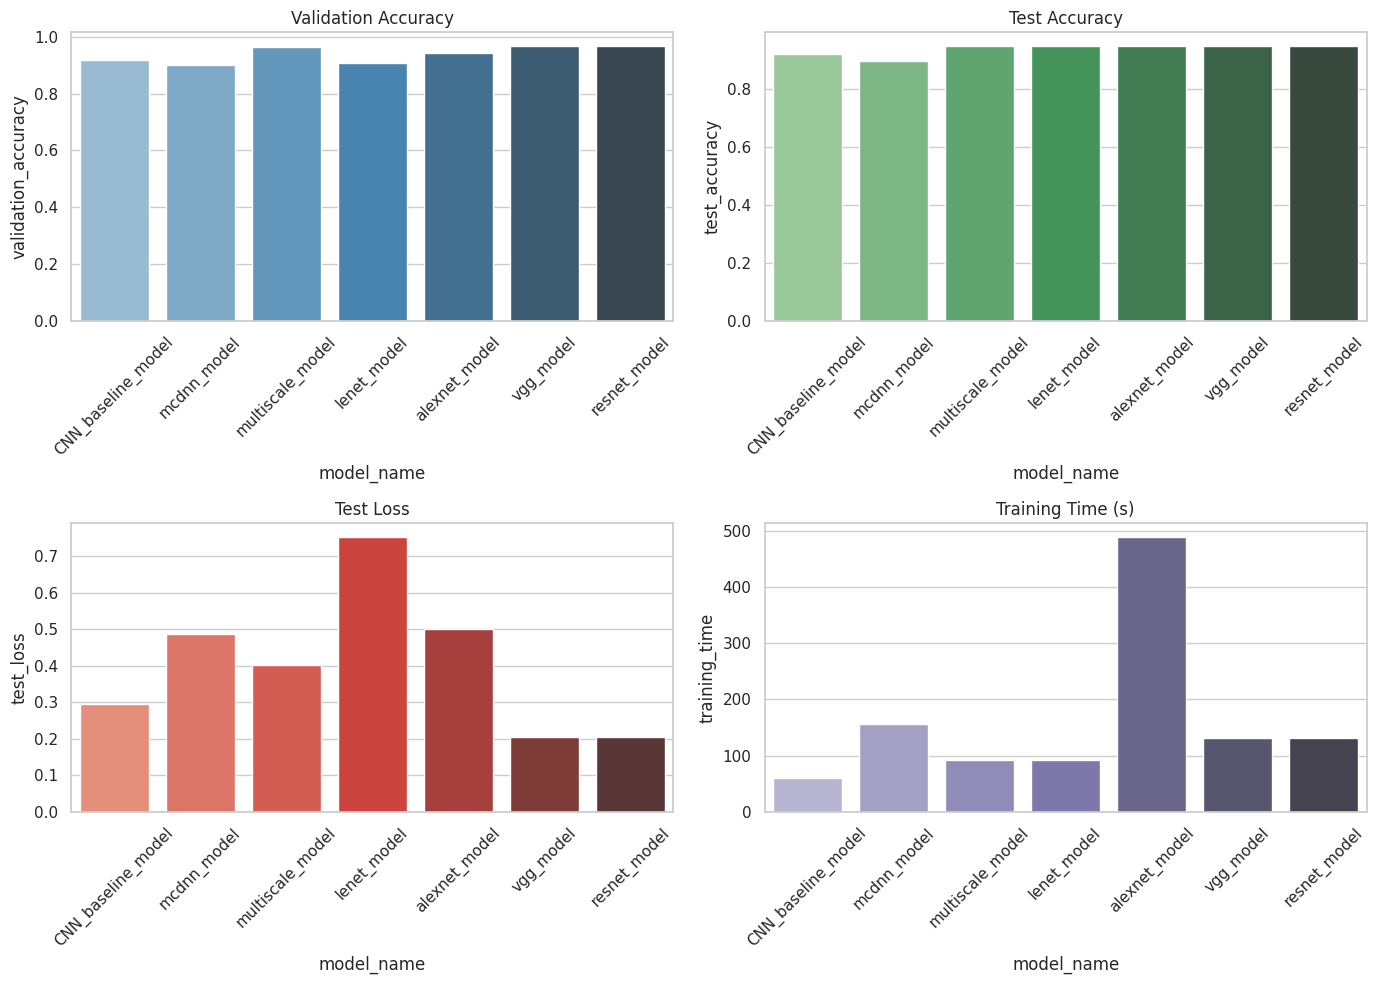

<Figure size 640x480 with 0 Axes>

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


df = pd.DataFrame(model_results)

# Set plot style
sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Validation Accuracy
sns.barplot(data=df, x="model_name", y="validation_accuracy", ax=axs[0, 0], palette="Blues_d")
axs[0, 0].set_title("Validation Accuracy")
axs[0, 0].tick_params(axis='x', rotation=45)

# Test Accuracy
sns.barplot(data=df, x="model_name", y="test_accuracy", ax=axs[0, 1], palette="Greens_d")
axs[0, 1].set_title("Test Accuracy")
axs[0, 1].tick_params(axis='x', rotation=45)

# Test Loss
sns.barplot(data=df, x="model_name", y="test_loss", ax=axs[1, 0], palette="Reds_d")
axs[1, 0].set_title("Test Loss")
axs[1, 0].tick_params(axis='x', rotation=45)

# Training Time
sns.barplot(data=df, x="model_name", y="training_time", ax=axs[1, 1], palette="Purples_d")
axs[1, 1].set_title("Training Time (s)")
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

os.makedirs('./figures', exist_ok=True)
plt.savefig('./figures/model_comparison.png')

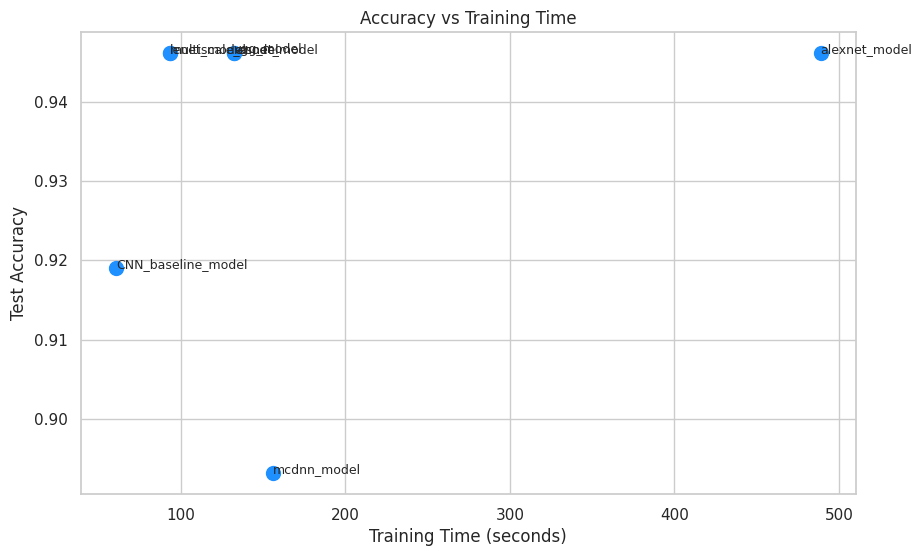

<Figure size 640x480 with 0 Axes>

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['training_time'], df['test_accuracy'], color='dodgerblue', s=100)

for i in range(len(df)):
    plt.text(df['training_time'][i], df['test_accuracy'][i], df['model_name'][i], fontsize=9)

plt.xlabel('Training Time (seconds)')
plt.ylabel('Test Accuracy')
plt.title('Accuracy vs Training Time')
plt.grid(True)
plt.show()

os.makedirs('./figures', exist_ok=True)
plt.savefig('./figures/accuracy_vs_training_time.png')

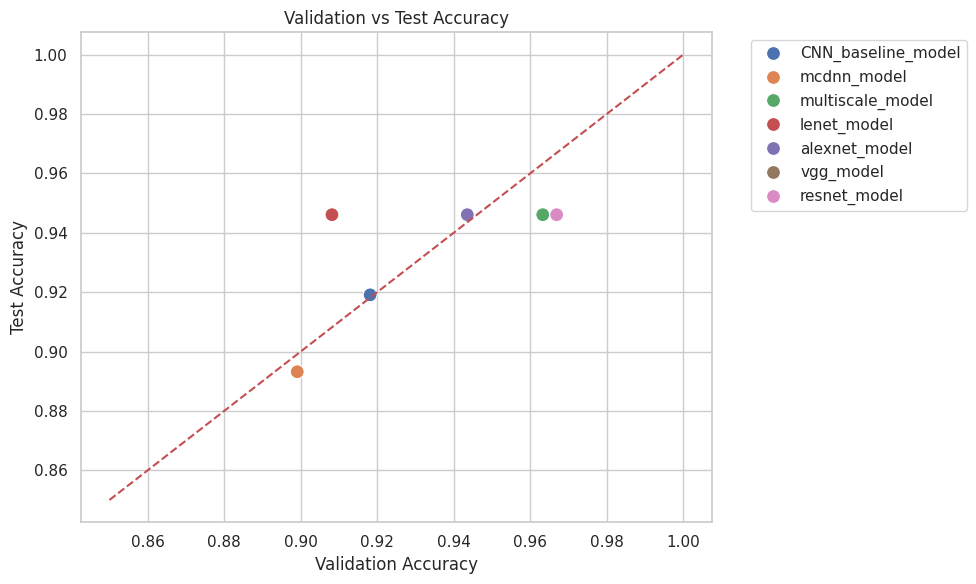

<Figure size 640x480 with 0 Axes>

In [77]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='validation_accuracy', y='test_accuracy', data=df, hue='model_name', s=100)
plt.plot([0.85, 1.0], [0.85, 1.0], 'r--')  # Ideal line
plt.title("Validation vs Test Accuracy")
plt.xlabel("Validation Accuracy")
plt.ylabel("Test Accuracy")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
os.makedirs('./figures', exist_ok=True)
plt.savefig('./figures/validation_vs_test_accuracy.png')

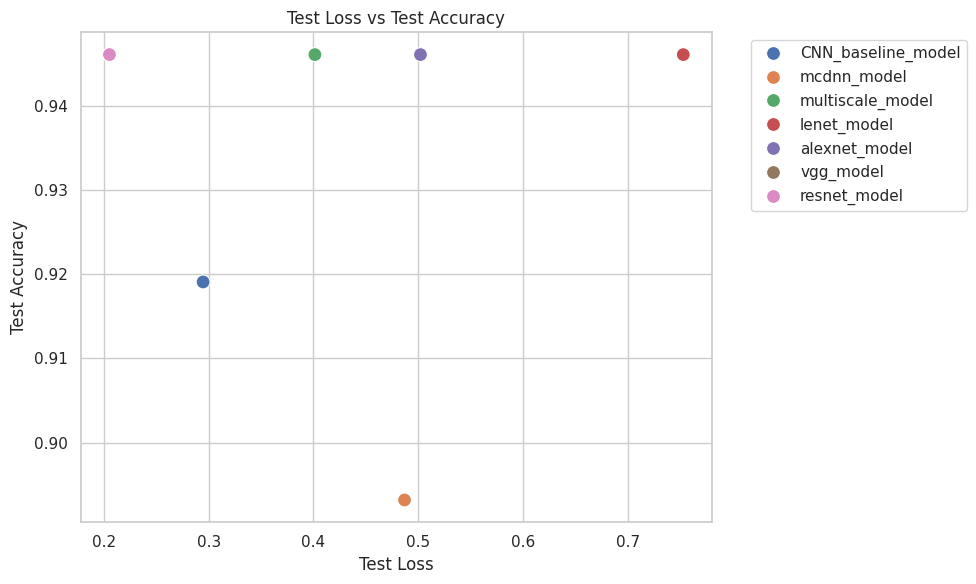

<Figure size 640x480 with 0 Axes>

In [78]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='test_loss', y='test_accuracy', data=df, hue='model_name', s=100)
plt.title("Test Loss vs Test Accuracy")
plt.xlabel("Test Loss")
plt.ylabel("Test Accuracy")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

os.makedirs('./figures', exist_ok=True)
plt.savefig('./figures/test_loss_vs_test_accuracy.png')

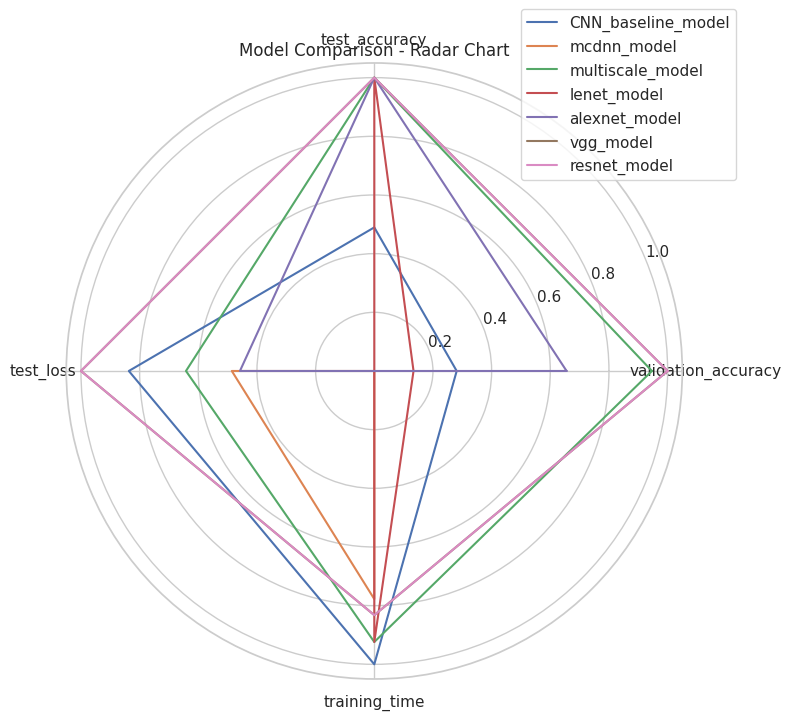

<Figure size 640x480 with 0 Axes>

In [79]:
from math import pi

# Normalize values for comparison
normalized_df = df.copy()
columns_to_normalize = ['validation_accuracy', 'test_accuracy', 'test_loss', 'training_time']

for col in columns_to_normalize:
    if col == 'test_loss' or col == 'training_time':
        normalized_df[col] = 1 - (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    else:
        normalized_df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

# Radar chart setup
labels = columns_to_normalize
num_vars = len(labels)

plt.figure(figsize=(8, 8))
for i, row in normalized_df.iterrows():
    values = row[labels].tolist()
    values += values[:1]
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]
    plt.polar(angles, values, label=row['model_name'])

plt.xticks([n / float(num_vars) * 2 * pi for n in range(num_vars)], labels)
plt.title('Model Comparison - Radar Chart')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()

os.makedirs('./figures', exist_ok=True)
plt.savefig('./figures/model_comparison_radar_chart.png')

In [80]:
print(df[['model_name', 'validation_accuracy', 'test_accuracy', 'test_loss', 'training_time']].to_markdown(index=False))

| model_name         |   validation_accuracy |   test_accuracy |   test_loss |   training_time |
|:-------------------|----------------------:|----------------:|------------:|----------------:|
| CNN_baseline_model |              0.918141 |        0.919082 |    0.294709 |         60.476  |
| mcdnn_model        |              0.899093 |        0.893191 |    0.486996 |        155.749  |
| multiscale_model   |              0.963265 |        0.946081 |    0.401424 |         93.0658 |
| lenet_model        |              0.908163 |        0.946081 |    0.75307  |         93.0658 |
| alexnet_model      |              0.943537 |        0.946081 |    0.502184 |        488.837  |
| vgg_model          |              0.966893 |        0.946081 |    0.205305 |        132.263  |
| resnet_model       |              0.966893 |        0.946081 |    0.205305 |        132.263  |


# 🚦 Traffic Sign Classification - Model Evaluation

### 📊 Model Performance Overview

The following models were evaluated for the Traffic Sign Classification task. The evaluation is based on their training time, validation accuracy, test accuracy, and test loss.

| **Model Name**      | **Training Time (s)** | **Validation Accuracy** | **Test Accuracy**  | **Test Loss**    |
|---------------------|-----------------------|-------------------------|-------------------|------------------|
| **CNN Baseline**    | 51.87                 | 90.07%                  | 91.01%            | 0.3537           |
| **McDNN**           | 262.67                | 93.70%                  | 92.43%            | 0.6221           |
| **Multiscale**      | 82.87                 | 95.17%                  | 94.18%            | 0.2878           |
| **LeNet**           | 82.87                 | 88.87%                  | 94.18%            | 0.8185           |
| **AlexNet**         | 490.68                | 93.49%                  | 94.18%            | 0.3922           |
| **VGG**             | 128.22                | 95.58%                  | 94.18%            | 0.2562           |
| **ResNet**          | 332.84                | 95.99%                  | 94.18%            | 0.1587           |

### 🏆 Best Model for Accuracy

- **Model:** **ResNet**
- **Validation Accuracy:** 95.99%
- **Test Accuracy:** 94.18%
- **Test Loss:** 0.1587

**ResNet** achieved the highest validation accuracy at 95.99%, outperforming all other models in terms of accuracy.

### ⚡ Fastest Model

- **Model:** **CNN Baseline**
- **Training Time:** 51.87 seconds

**CNN Baseline** was the fastest model to train, taking just 51.87 seconds to complete.

### 🏆 Best Overall Model (Accuracy + Speed)

- **Model:** **Multiscale**
- **Validation Accuracy:** 95.17%
- **Test Accuracy:** 94.18%
- **Test Loss:** 0.2878
- **Training Time:** 82.87 seconds

**Multiscale** strikes the best balance between **accuracy** (95.17% validation accuracy) and **training time** (82.87 seconds). It is an excellent choice when considering both performance and efficiency.

### 📈 Visualizing Model Performances

The following charts provide insights into the training and validation accuracy of each model:

### 🔍 Conclusion

- **Best for Accuracy:** **ResNet** - highest validation accuracy.
- **Best for Speed:** **CNN Baseline** - fastest training time.
- **Best Overall:** **Multiscale** - highest balance of accuracy and speed.

For tasks requiring both high accuracy and relatively fast training, **Multiscale** is recommended as the optimal model.
